# <b>1 <span style='color:#9146ff'>|</span> Setting Environment</b>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_style('darkgrid')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score , recall_score , f1_score , roc_curve, RocCurveDisplay, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow import keras

# <b>2 <span style='color:#9146ff'>|</span> EDA</b>

In [2]:
df = pd.read_csv('diabetes_dataset.csv')

In [3]:
df.head()

,age,gender,ethnicity,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,systolic_bp,diastolic_bp,heart_rate,...,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,urea_mg_dL,rbc_million_cmm,wbc_count_uL,creatinine_mg_dL,albumin_ug_mL,diagnosed_diabetes
0,58,Male,Asian,0,0,0,30.5,134,78,68,...,6.36,8.18,29.6,Type 2,24.981605,4.951948,5978.115769,0.657054,4777.906123,1
1,48,Female,White,0,0,0,23.1,129,76,67,...,2.00,5.63,23.0,No Diabetes,48.028572,4.817429,7210.736134,0.595509,3631.426849,0
2,60,Male,Hispanic,1,0,0,22.2,115,73,74,...,5.07,7.51,44.7,Type 2,39.279758,4.377592,4694.508485,0.637939,3103.819396,1
3,74,Female,Black,0,0,0,26.8,120,93,68,...,5.28,9.03,38.2,Type 2,33.946339,4.733032,7127.859177,0.973489,4839.488066,1
4,46,Male,White,0,0,0,21.2,92,67,67,...,12.74,7.20,23.5,Type 2,16.240746,4.412742,5421.569448,1.384534,3872.521566,1


In [4]:
df.shape

(100000, 26)

In [5]:
df.columns

Index(['age', 'gender', 'ethnicity', 'family_history_diabetes',
       'hypertension_history', 'cardiovascular_history', 'bmi', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol',
       'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
       'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score',
       'diabetes_stage', 'urea_mg_dL', 'rbc_million_cmm', 'wbc_count_uL',
       'creatinine_mg_dL', 'albumin_ug_mL', 'diagnosed_diabetes'],
      dtype='object')

In [6]:
print("\n--- Missing Values ---")
((df.isnull().sum()) / (len(df))) * 100


--- Missing Values ---


,0
age,0.0
gender,0.0
ethnicity,0.0
family_history_diabetes,0.0
hypertension_history,0.0
cardiovascular_history,0.0
bmi,0.0
systolic_bp,0.0
diastolic_bp,0.0
heart_rate,0.0


In [7]:
# checking for duplicates
print(f"There are {df.duplicated().sum()} of duplicates in the dataset")

There are 0 of duplicates in the dataset


In [8]:
print("\n--- Data Info ---")
df.info()


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      100000 non-null  int64  
 1   gender                   100000 non-null  object 
 2   ethnicity                100000 non-null  object 
 3   family_history_diabetes  100000 non-null  int64  
 4   hypertension_history     100000 non-null  int64  
 5   cardiovascular_history   100000 non-null  int64  
 6   bmi                      100000 non-null  float64
 7   systolic_bp              100000 non-null  int64  
 8   diastolic_bp             100000 non-null  int64  
 9   heart_rate               100000 non-null  int64  
 10  cholesterol_total        100000 non-null  int64  
 11  hdl_cholesterol          100000 non-null  int64  
 12  ldl_cholesterol          100000 non-null  int64  
 13  triglycerides            100000 non-null 

In [9]:
print("\n--- Description ---")
df.describe()


--- Description ---


,age,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,...,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,urea_mg_dL,rbc_million_cmm,wbc_count_uL,creatinine_mg_dL,albumin_ug_mL,diagnosed_diabetes
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.12041,0.219410,0.250800,0.079200,25.612653,115.799610,75.23249,69.632870,185.978110,54.042790,...,160.035050,9.061242,6.520776,30.222362,29.979530,4.753325,7504.369765,0.998972,4002.007961,0.599980
std,15.60460,0.413849,0.433476,0.270052,3.586705,14.284073,8.20425,8.371954,32.013005,10.267374,...,30.935472,4.954060,0.813921,9.061505,11.533658,0.721729,2021.665956,0.288623,576.537570,0.489904
min,18.00000,0.000000,0.000000,0.000000,15.000000,90.000000,50.00000,40.000000,100.000000,20.000000,...,70.000000,2.000000,4.000000,2.700000,10.000221,3.500012,4000.016087,0.500002,3000.043021,0.000000
25%,39.00000,0.000000,0.000000,0.000000,23.200000,106.000000,70.00000,64.000000,164.000000,47.000000,...,139.000000,5.090000,5.970000,23.800000,19.981842,4.126794,5752.099308,0.748984,3502.026247,0.000000
50%,50.00000,0.000000,0.000000,0.000000,25.600000,116.000000,75.00000,70.000000,186.000000,54.000000,...,160.000000,8.790000,6.520000,29.000000,30.025191,4.754703,7507.948594,0.997960,4006.301446,1.000000
75%,61.00000,0.000000,1.000000,0.000000,28.000000,125.000000,81.00000,75.000000,208.000000,61.000000,...,181.000000,12.450000,7.070000,35.600000,39.980549,5.376028,9253.095788,1.249406,4499.294147,1.000000
max,90.00000,1.000000,1.000000,1.000000,39.200000,179.000000,110.00000,105.000000,318.000000,98.000000,...,287.000000,32.220000,9.800000,67.200000,49.999682,5.999973,10999.854830,1.499995,4999.996630,1.000000


In [10]:
df.nunique()

,0
age,73
gender,3
ethnicity,5
family_history_diabetes,2
hypertension_history,2
cardiovascular_history,2
bmi,240
systolic_bp,86
diastolic_bp,60
heart_rate,64


In [11]:
df['diagnosed_diabetes'] = df['diagnosed_diabetes'].map({0: 'Negative', 1: 'Positive'})
df['family_history_diabetes'] = df['family_history_diabetes'].map({0: 'No', 1: 'Yes'})
df['hypertension_history'] = df['hypertension_history'].map({0: 'No', 1: 'Yes'})
df['cardiovascular_history'] = df['cardiovascular_history'].map({0: 'No', 1: 'Yes'})

In [12]:
categorical_features=[]
numerical_features=[]
for col in df.columns :
    if len(df[col].unique()) > 6 :
        numerical_features.append(col)
    else :
        categorical_features.append(col)

In [13]:
for i in categorical_features :
    if i not in  ['name' , 'description'] :
        print(f"{i} : {np.unique(df[i])}\n")

gender : ['Female' 'Male' 'Other']

ethnicity : ['Asian' 'Black' 'Hispanic' 'Other' 'White']

family_history_diabetes : ['No' 'Yes']

hypertension_history : ['No' 'Yes']

cardiovascular_history : ['No' 'Yes']

diabetes_stage : ['Gestational' 'No Diabetes' 'Pre-Diabetes' 'Type 1' 'Type 2']

diagnosed_diabetes : ['Negative' 'Positive']



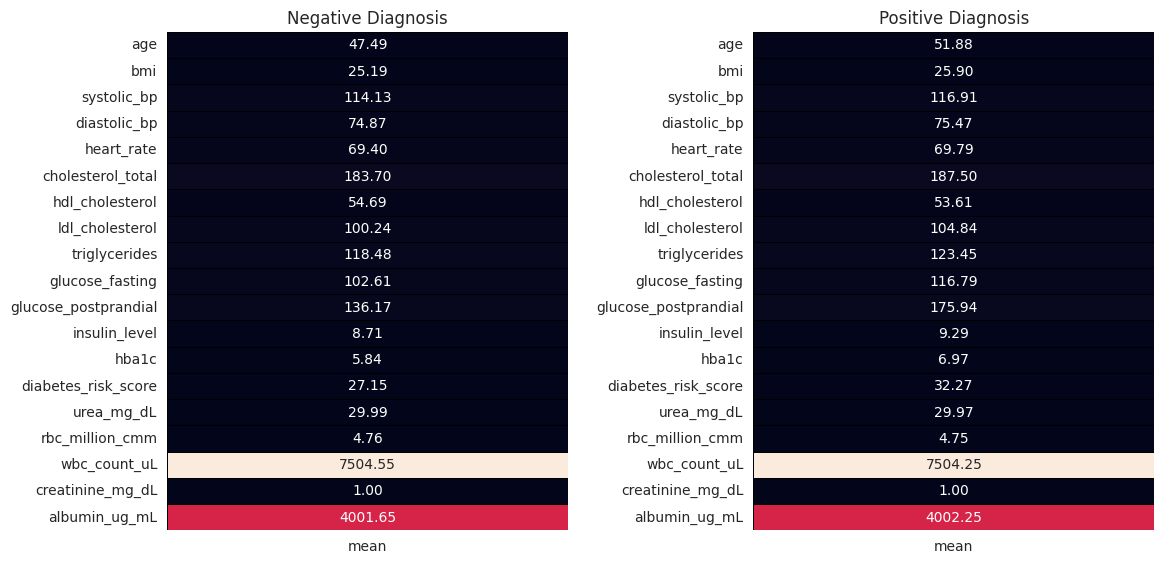

In [14]:
n = df[df['diagnosed_diabetes'] == 'Negative'].describe().T
p = df[df['diagnosed_diabetes'] == 'Positive'].describe().T

fig , ax = plt.subplots(nrows = 1 , ncols = 2 , figsize = (12, 6))
plt.subplot(1 , 2 ,1)
sns.heatmap(n[['mean']],annot = True,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Negative Diagnosis');

plt.subplot(1,2,2)
sns.heatmap(p[['mean']],annot = True,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Positive Diagnosis');

fig.tight_layout(pad = 2)

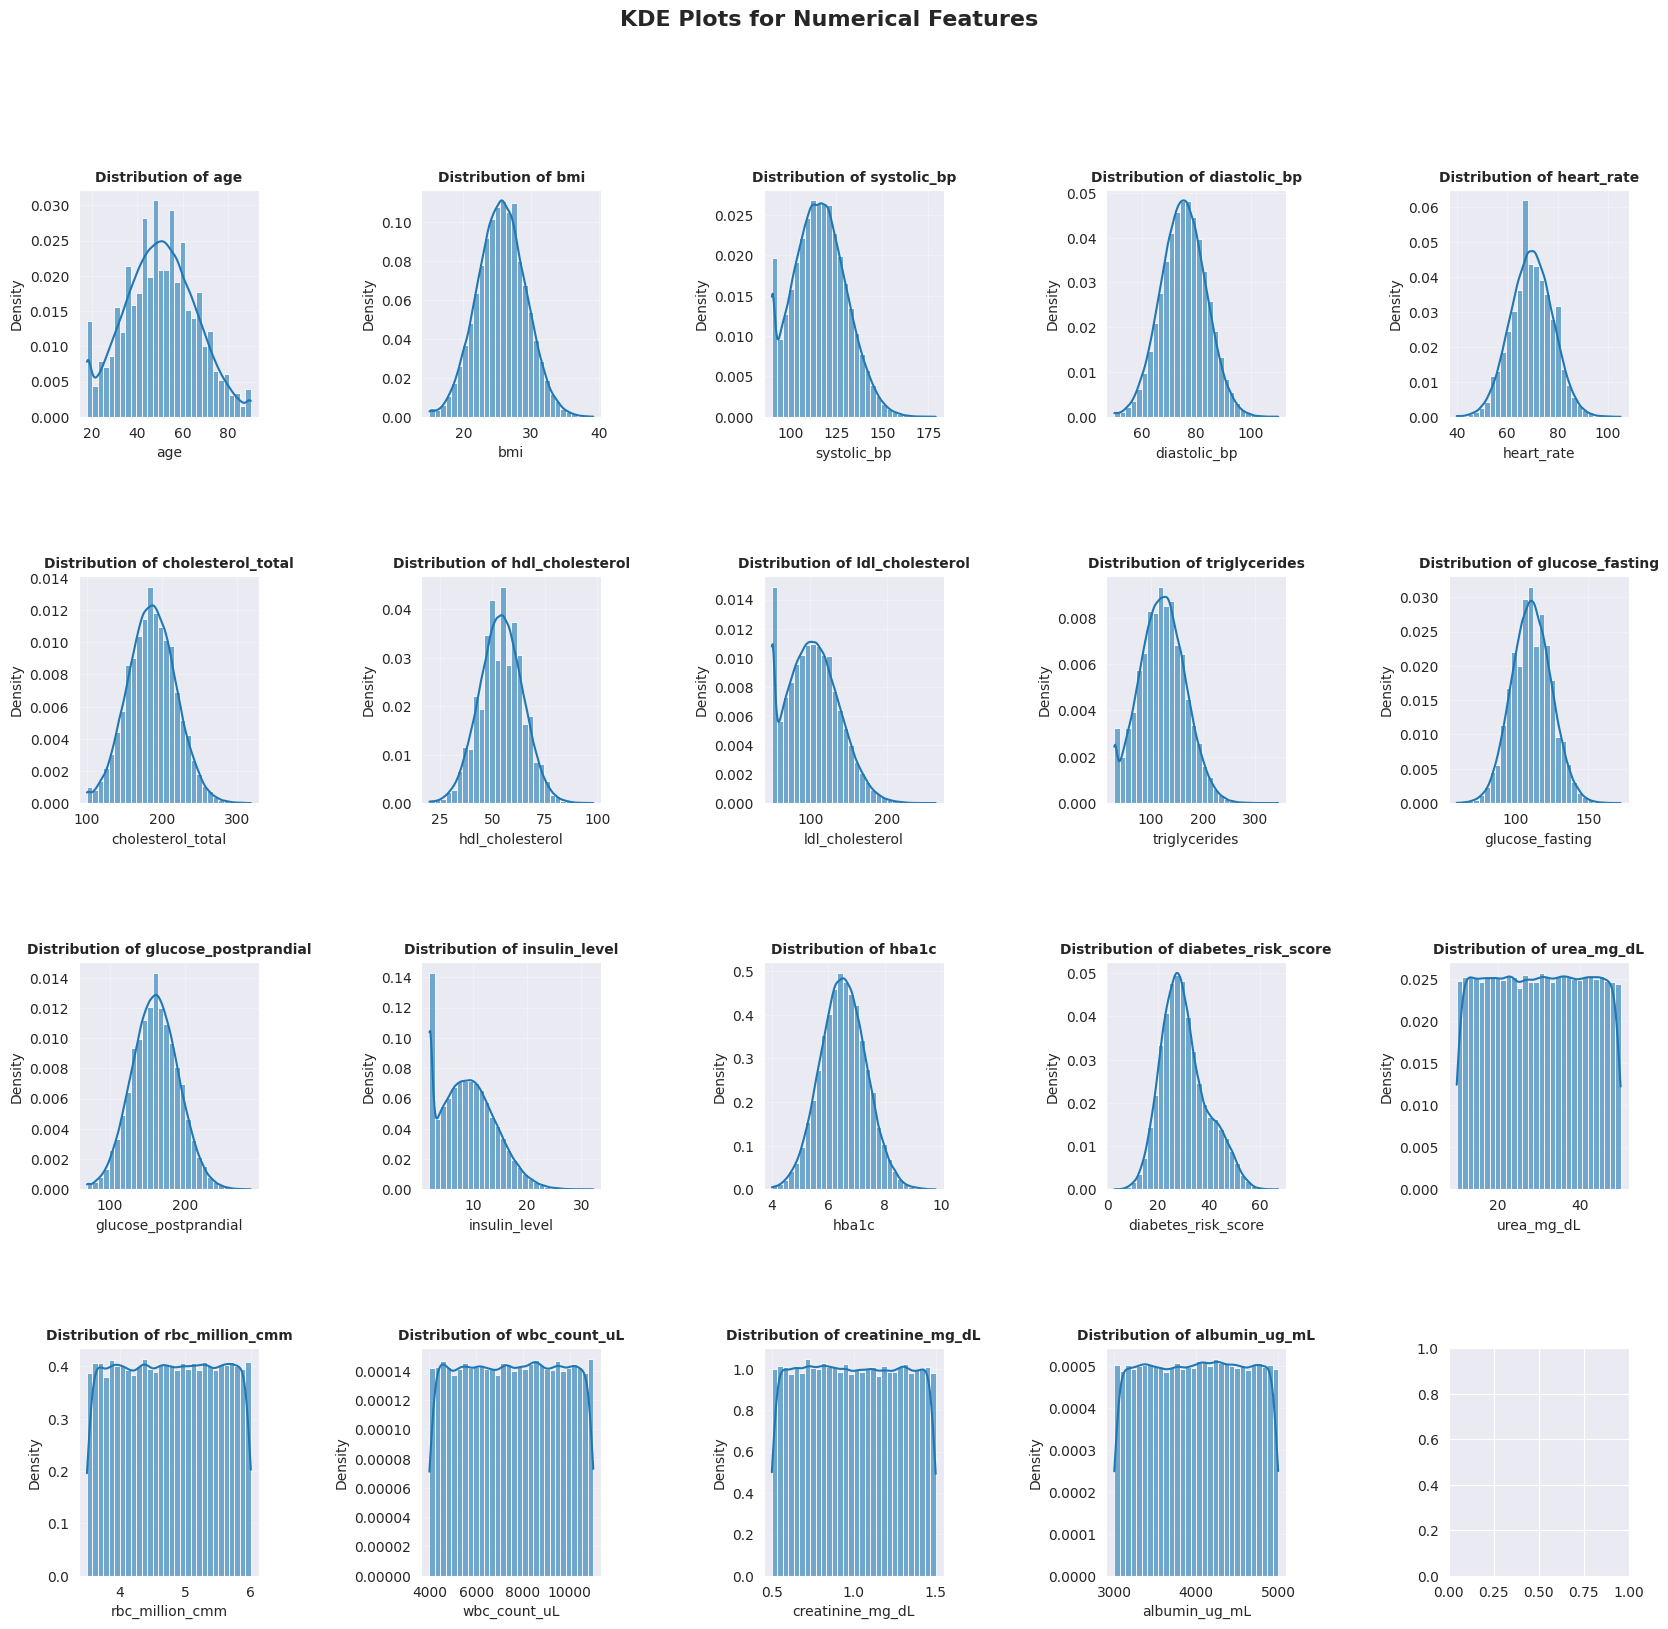

In [15]:
n_rows = math.ceil(len(numerical_features) / 5)
fig, ax = plt.subplots(figsize=(20, 18), nrows=n_rows, ncols=5)
ax = ax.flatten()


for idx, col in enumerate(numerical_features):

    sns.histplot(
        data=df[col],
        bins=30,
        kde=True,
        stat='density',
        ax=ax[idx] ,
        alpha=0.6
    )


    ax[idx].set_title(f'Distribution of {col}', fontsize=10, weight='bold')
    ax[idx].set_xlabel(col)
    ax[idx].set_ylabel('Density')
    ax[idx].grid(alpha=0.3)

fig.suptitle("KDE Plots for Numerical Features", fontsize=16, weight='bold')
fig.subplots_adjust(hspace=0.7, wspace=0.9)
plt.show()

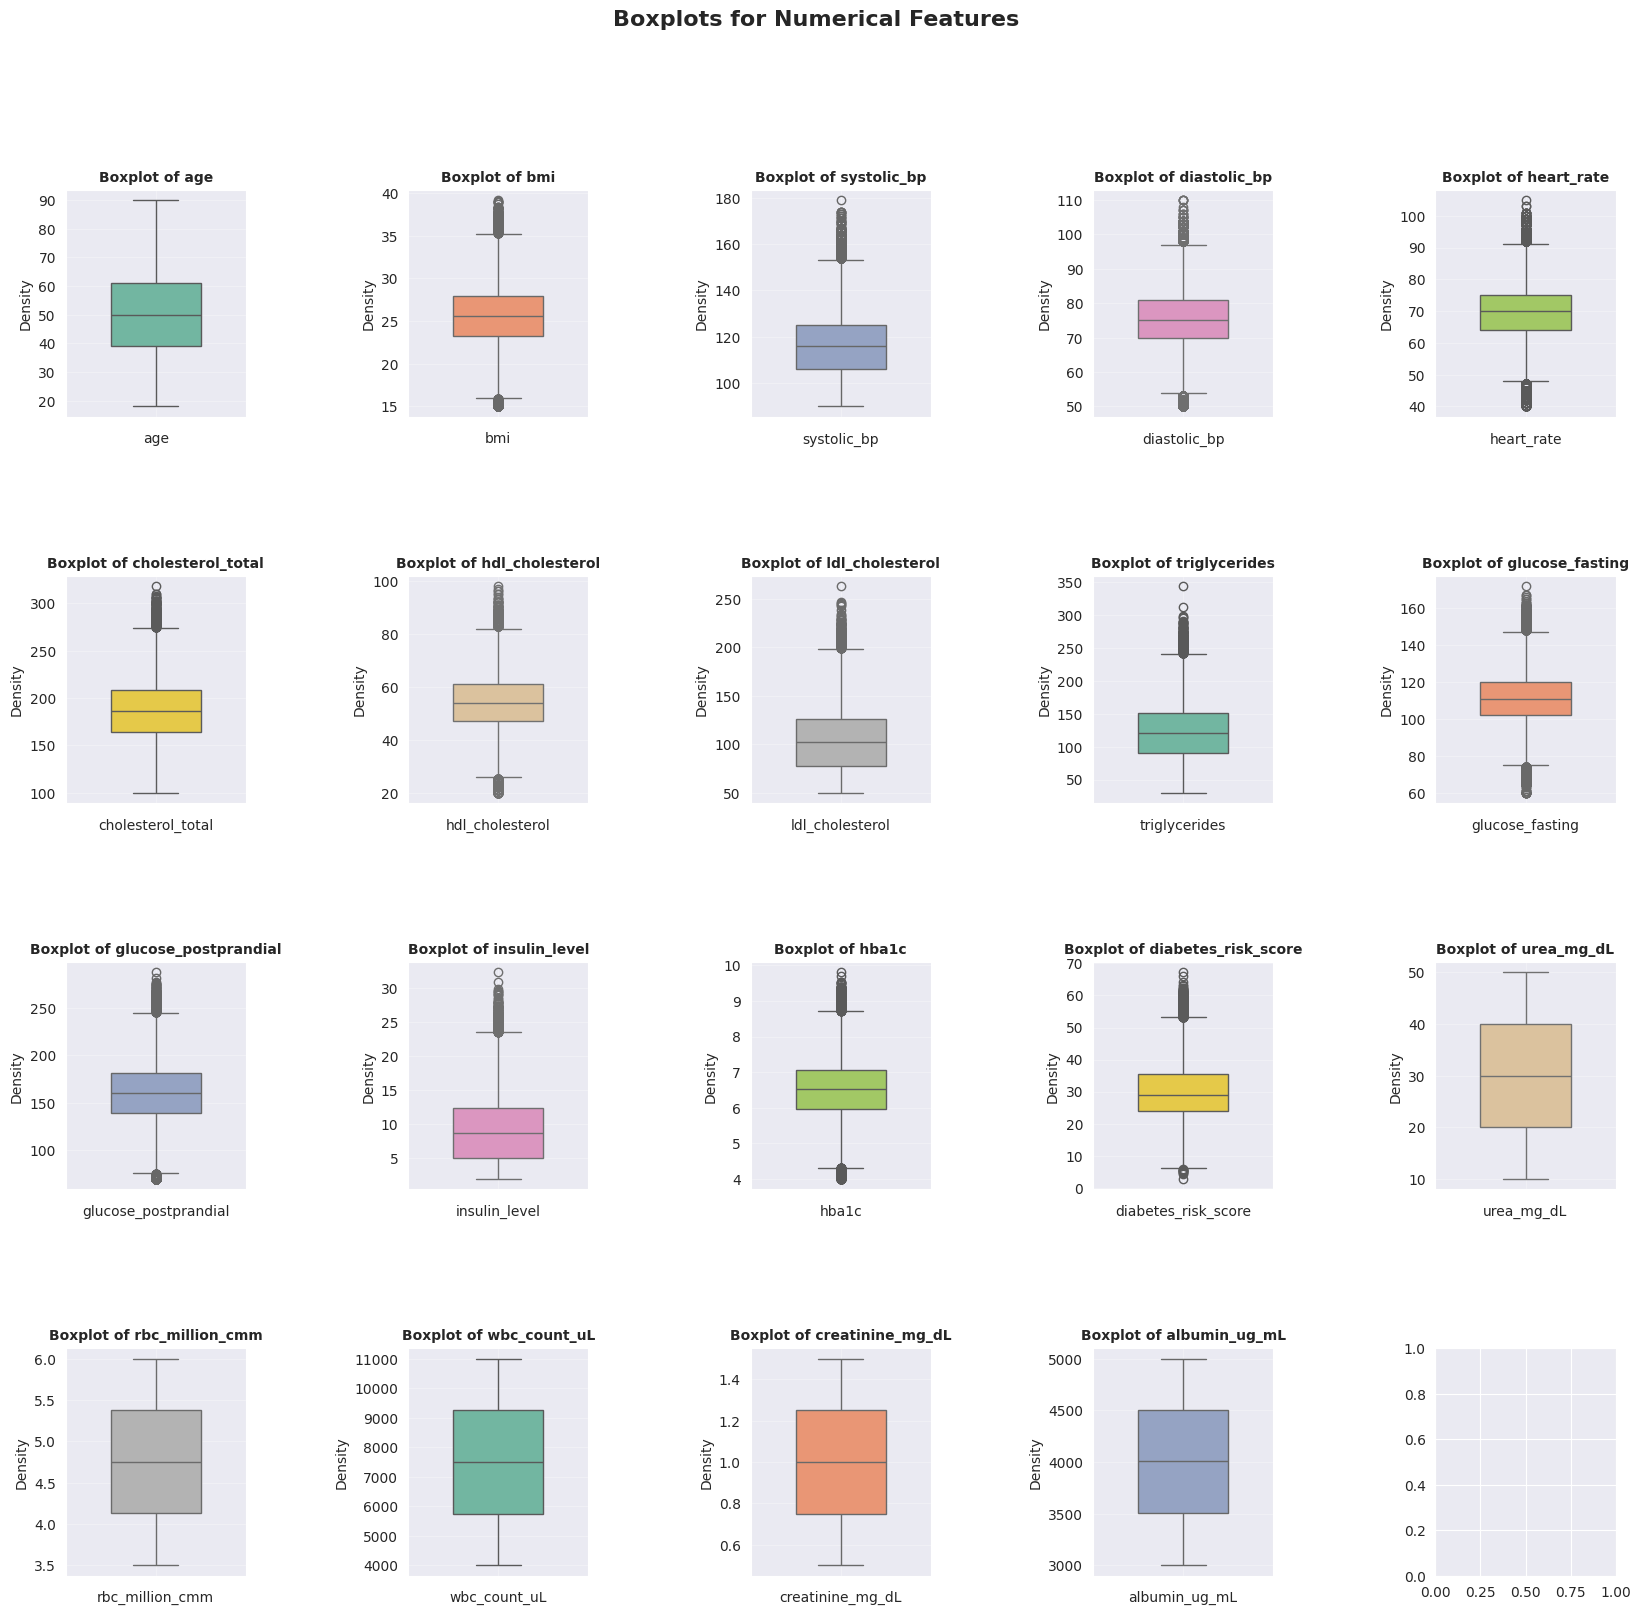

In [16]:
n_rows = math.ceil(len(numerical_features) / 5)
fig, ax = plt.subplots(figsize=(20, 18), nrows=n_rows, ncols=5)
ax = ax.flatten()


for idx, col in enumerate(numerical_features):

    sns.boxplot(
        y=df[col],
        ax=ax[idx],
        color=sns.color_palette("Set2")[idx % 8] ,
        width=0.5
    )

    ax[idx].set_title(f'Boxplot of {col}', fontsize=10, weight='bold')
    ax[idx].set_xlabel(col)
    ax[idx].set_ylabel('Density')
    ax[idx].grid(alpha=0.3)

fig.suptitle("Boxplots for Numerical Features", fontsize=16, weight='bold')
fig.subplots_adjust(hspace=0.7, wspace=0.9)
plt.show()

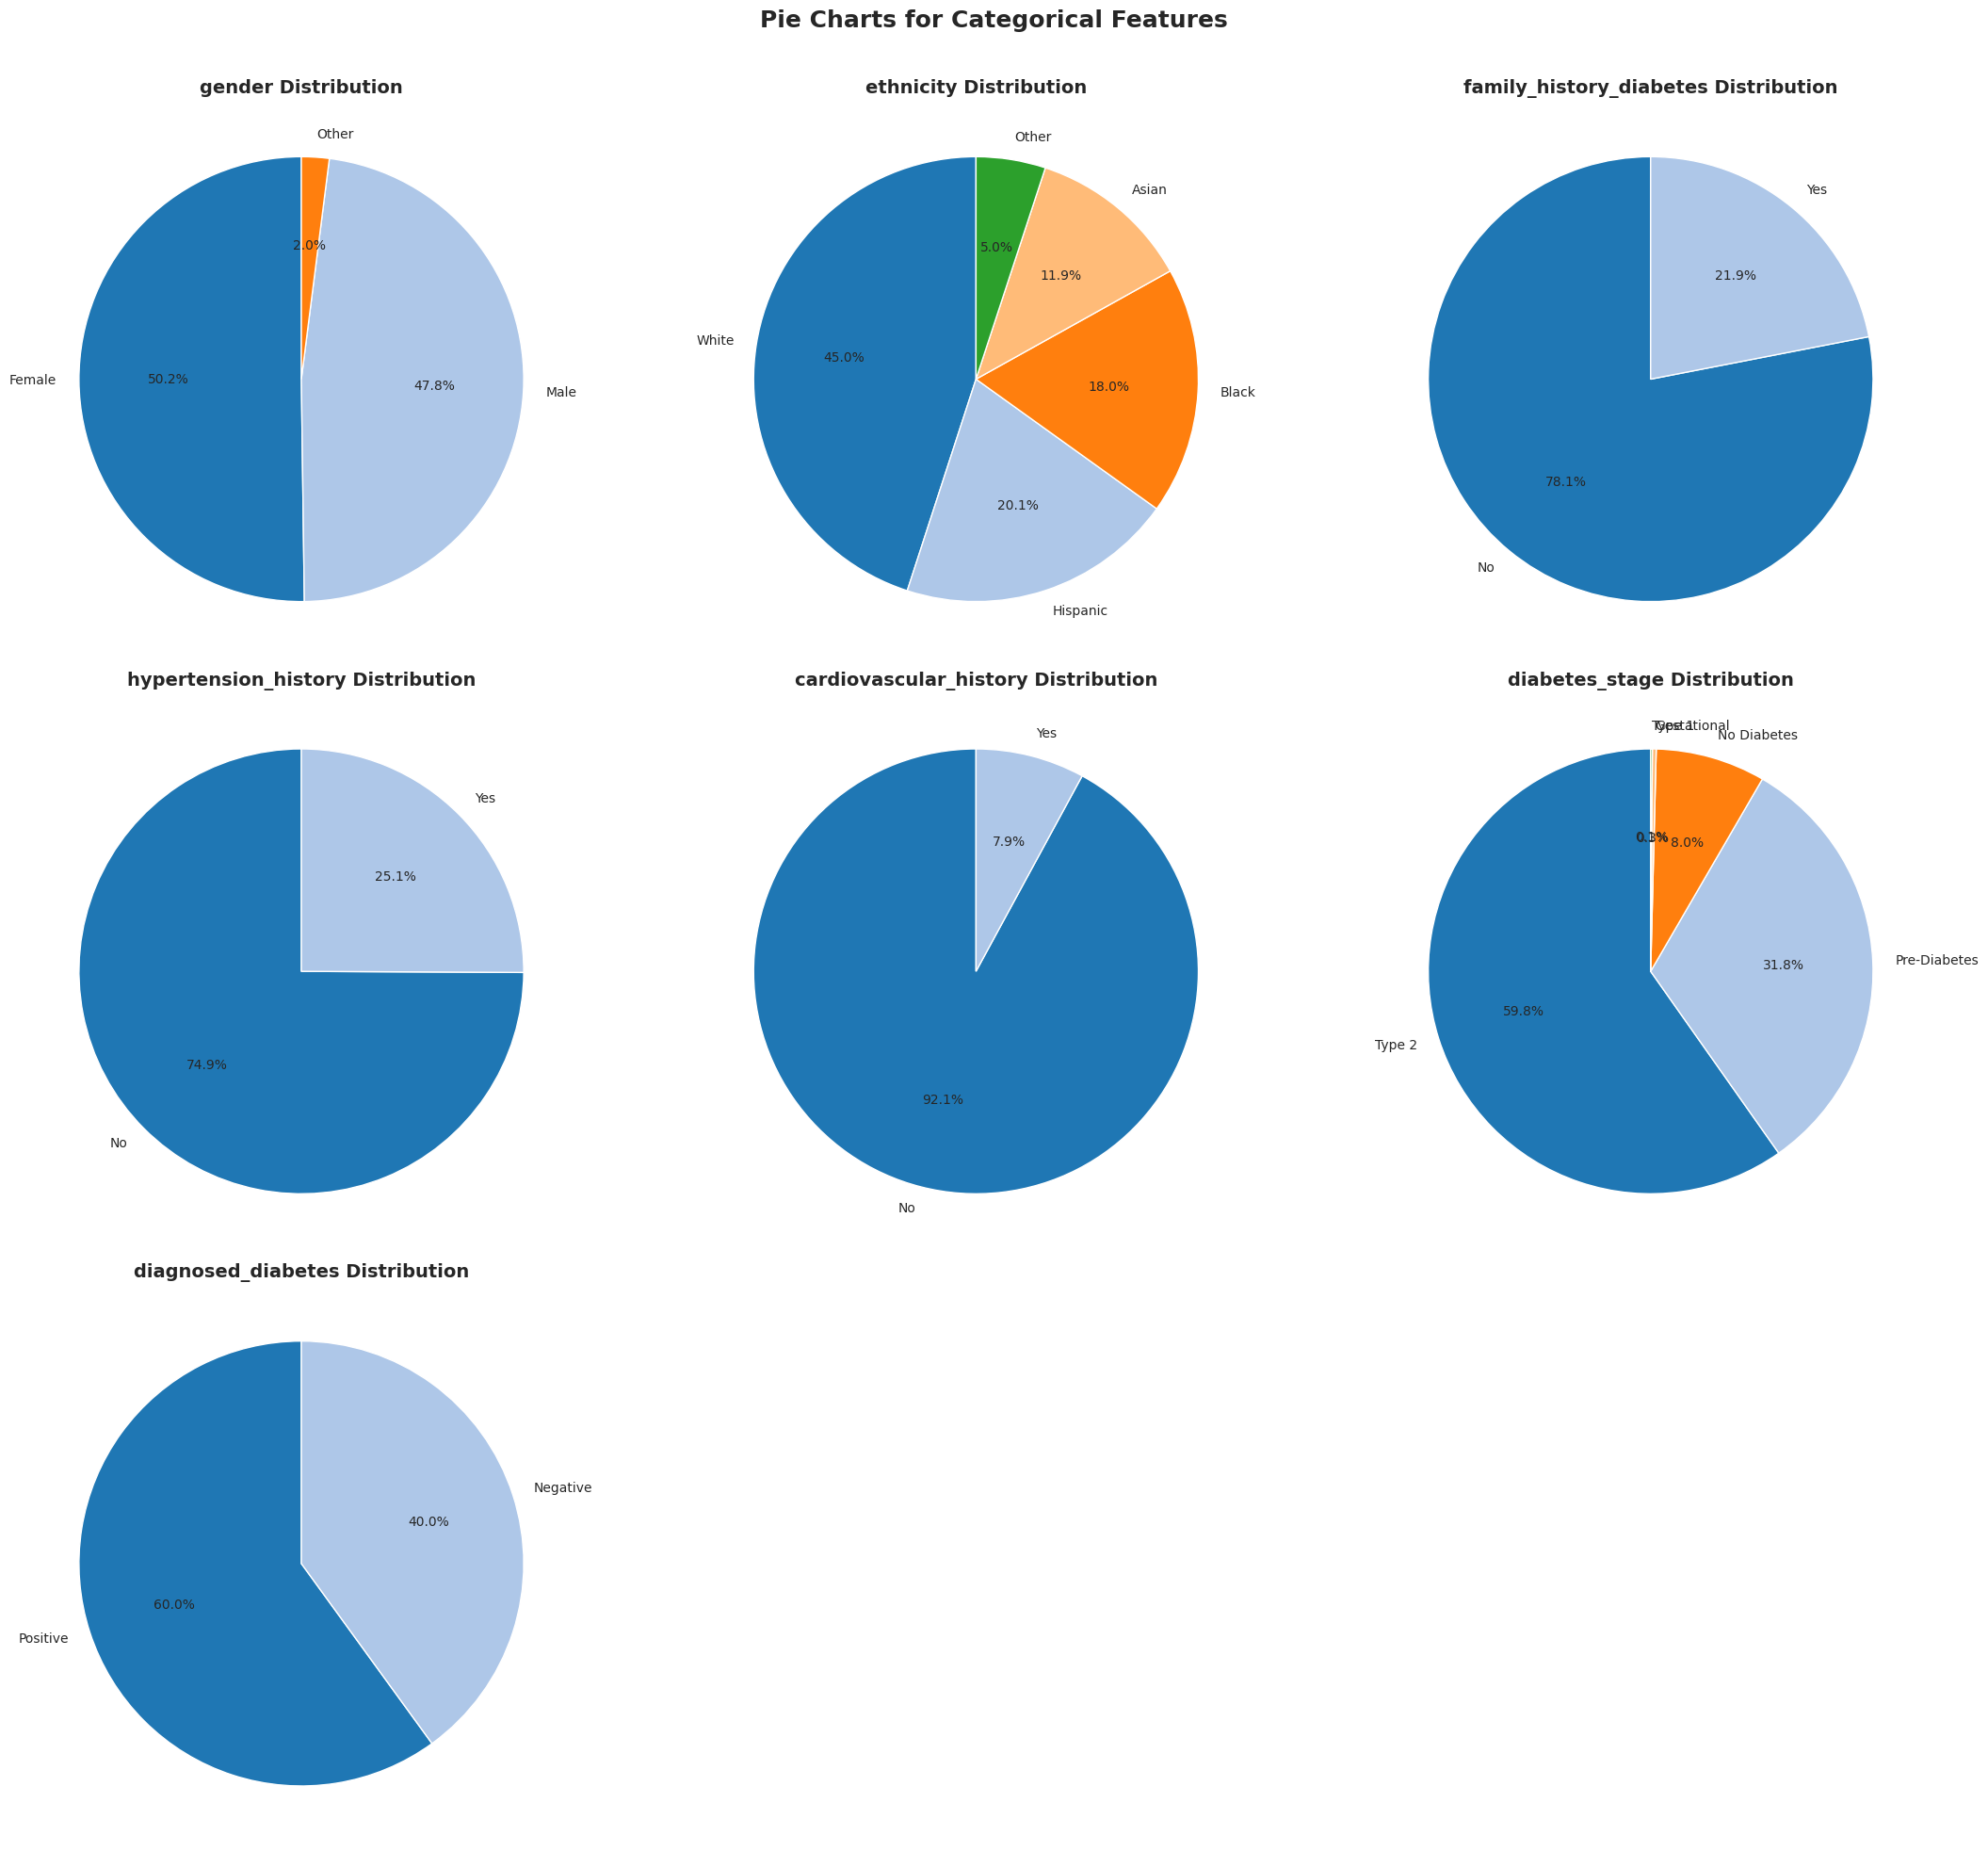

In [17]:
n_rows = math.ceil(len(categorical_features) / 3)
fig, ax = plt.subplots(figsize=(22, 20), nrows=n_rows, ncols=3)
ax = ax.flatten()

colors = plt.cm.tab20.colors

for idx, col in enumerate(categorical_features):
    counts = df[col].value_counts()

    ax[idx].pie(
        counts.values,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(counts)]
    )
    ax[idx].set_title(f"{col} Distribution", fontsize=14, weight='bold')

for j in range(len(categorical_features), len(ax)):
    fig.delaxes(ax[j])

fig.suptitle("Pie Charts for Categorical Features", fontsize=18, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


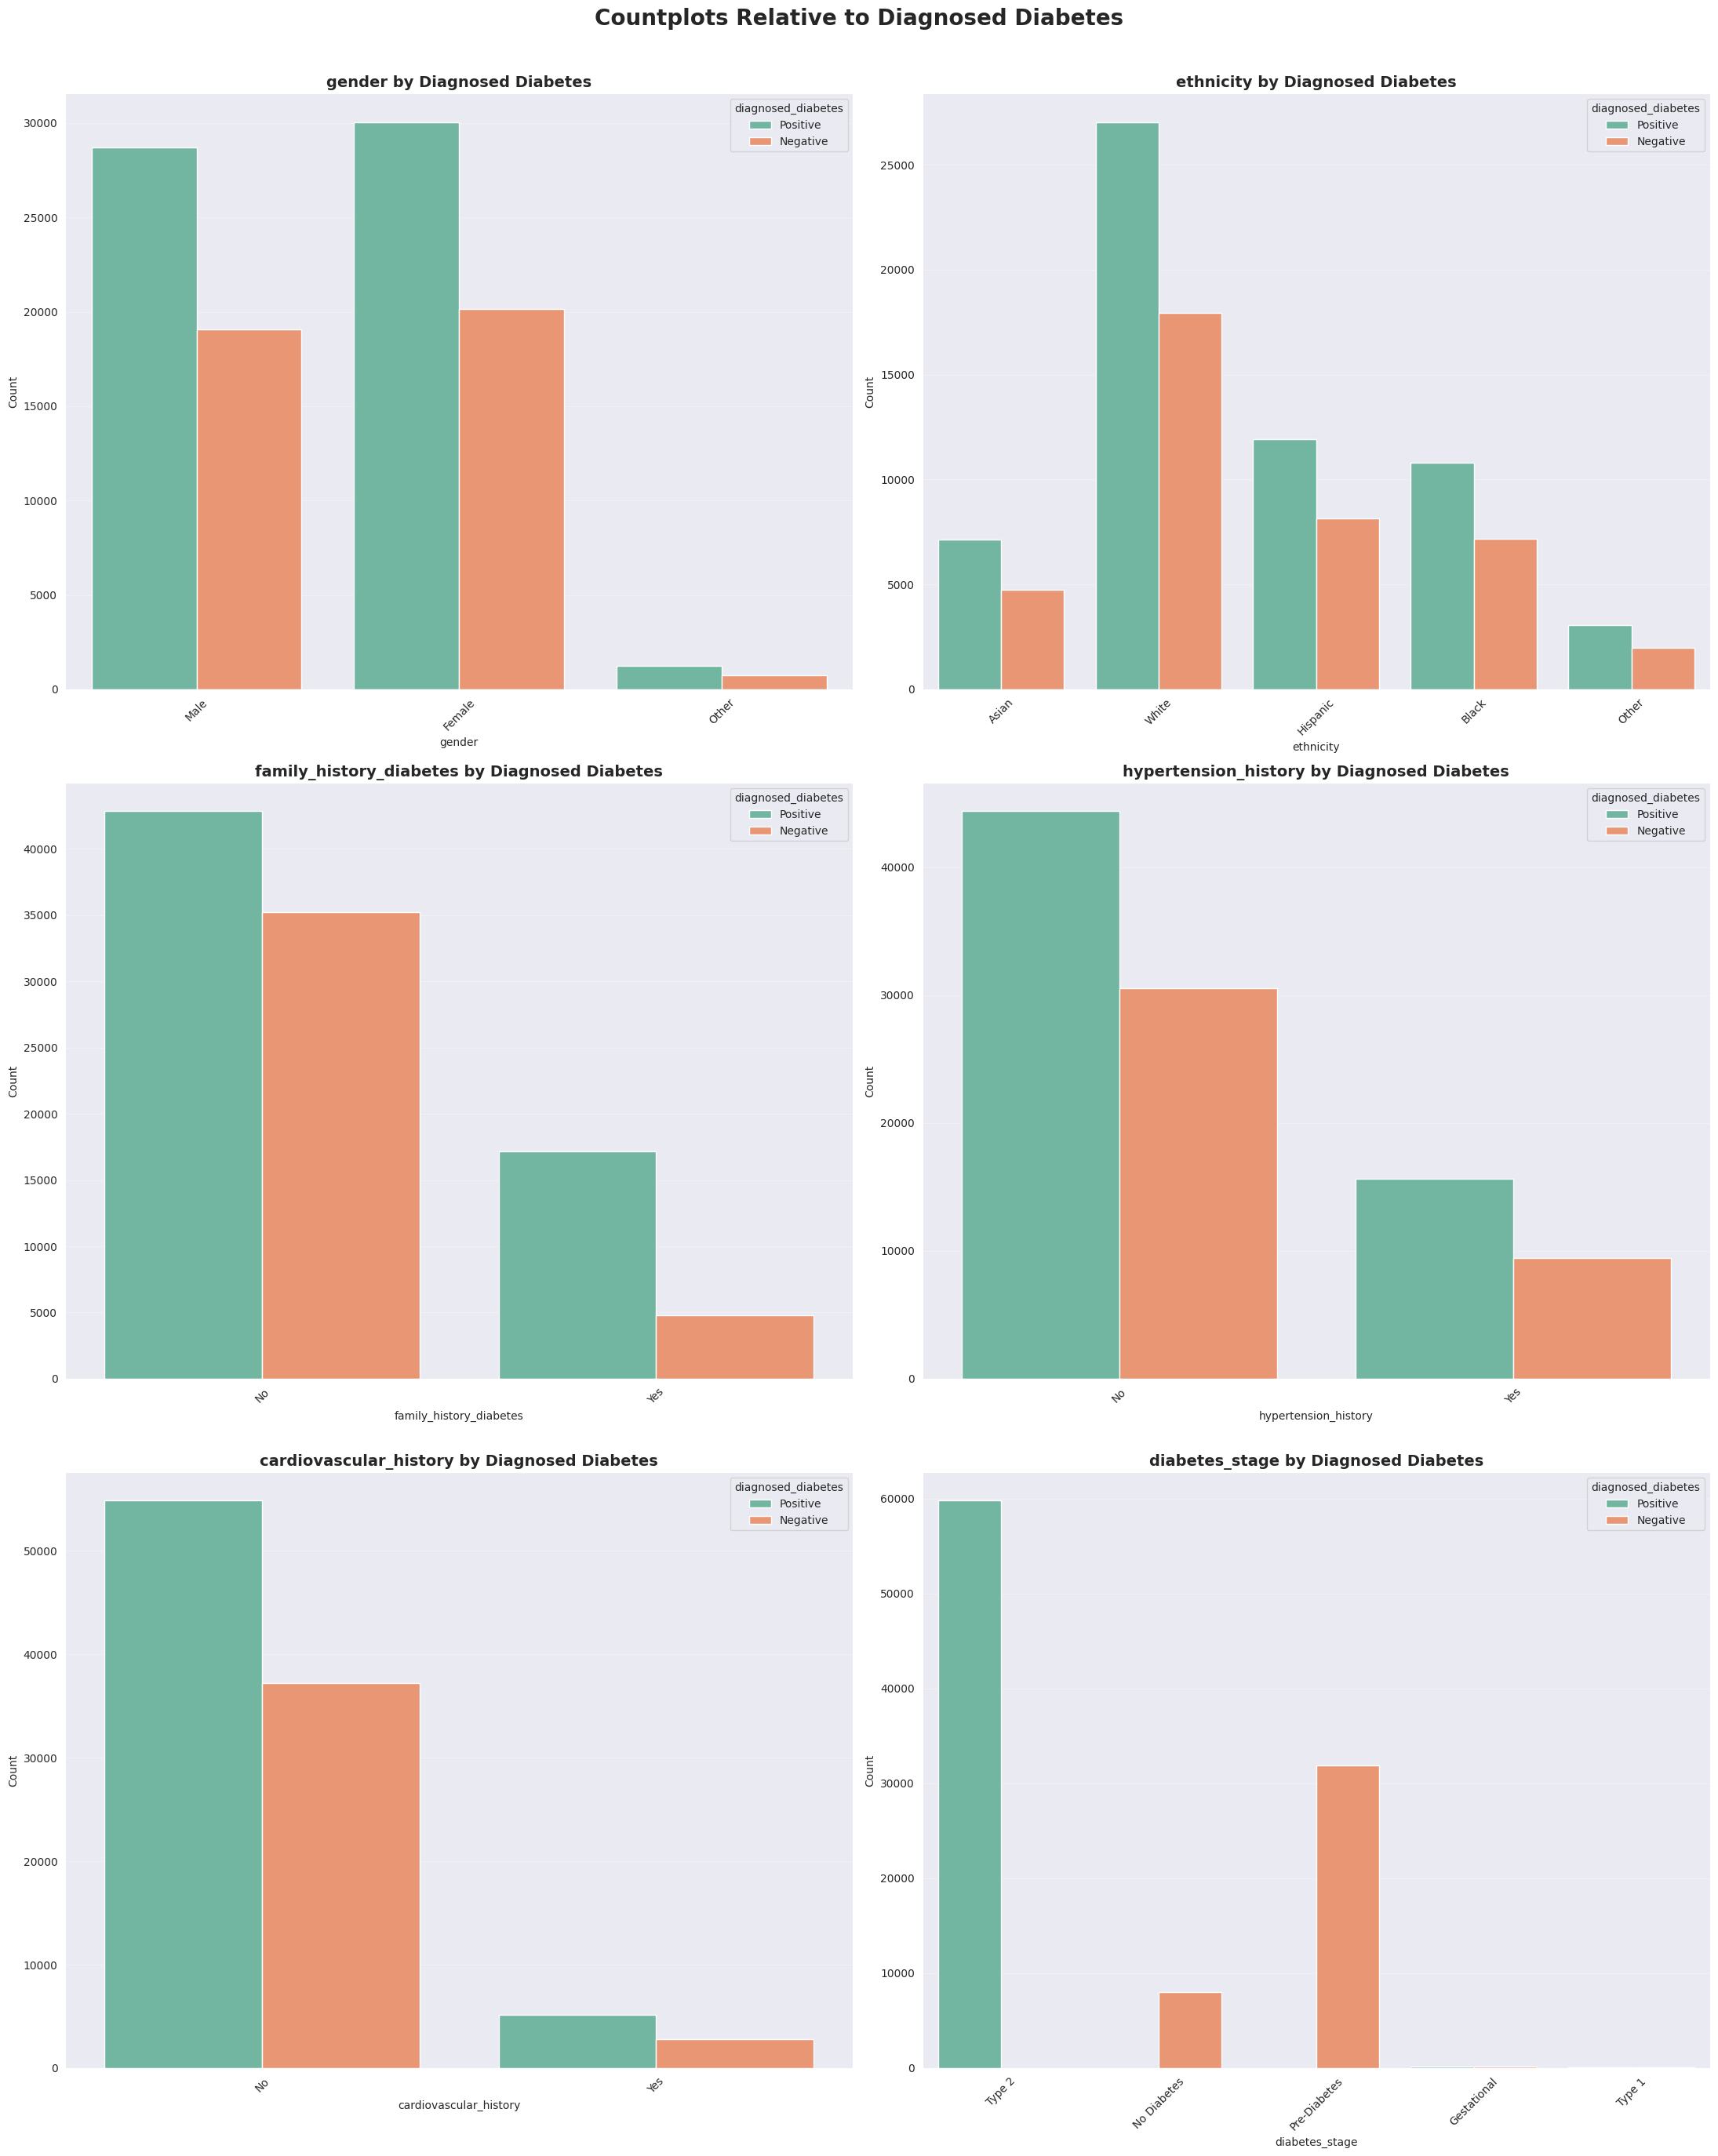

In [18]:
n_rows = math.ceil(len(categorical_features[:-1]) / 2)
fig, ax = plt.subplots(figsize=(22, 28), nrows=n_rows, ncols=2)
ax = ax.flatten()

for idx, col in enumerate(categorical_features[:-1]):

    sns.countplot(
        data=df,
        x=col,
        hue='diagnosed_diabetes',
        ax=ax[idx],
        palette='Set2'
    )

    ax[idx].set_title(f'{col} by Diagnosed Diabetes', fontsize=14, weight='bold')
    ax[idx].set_xlabel(col)
    ax[idx].set_ylabel("Count")
    ax[idx].tick_params(axis='x', rotation=45)
    ax[idx].grid(axis='y', alpha=0.3)

fig.suptitle("Countplots Relative to Diagnosed Diabetes",
             fontsize=20, weight='bold')


plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


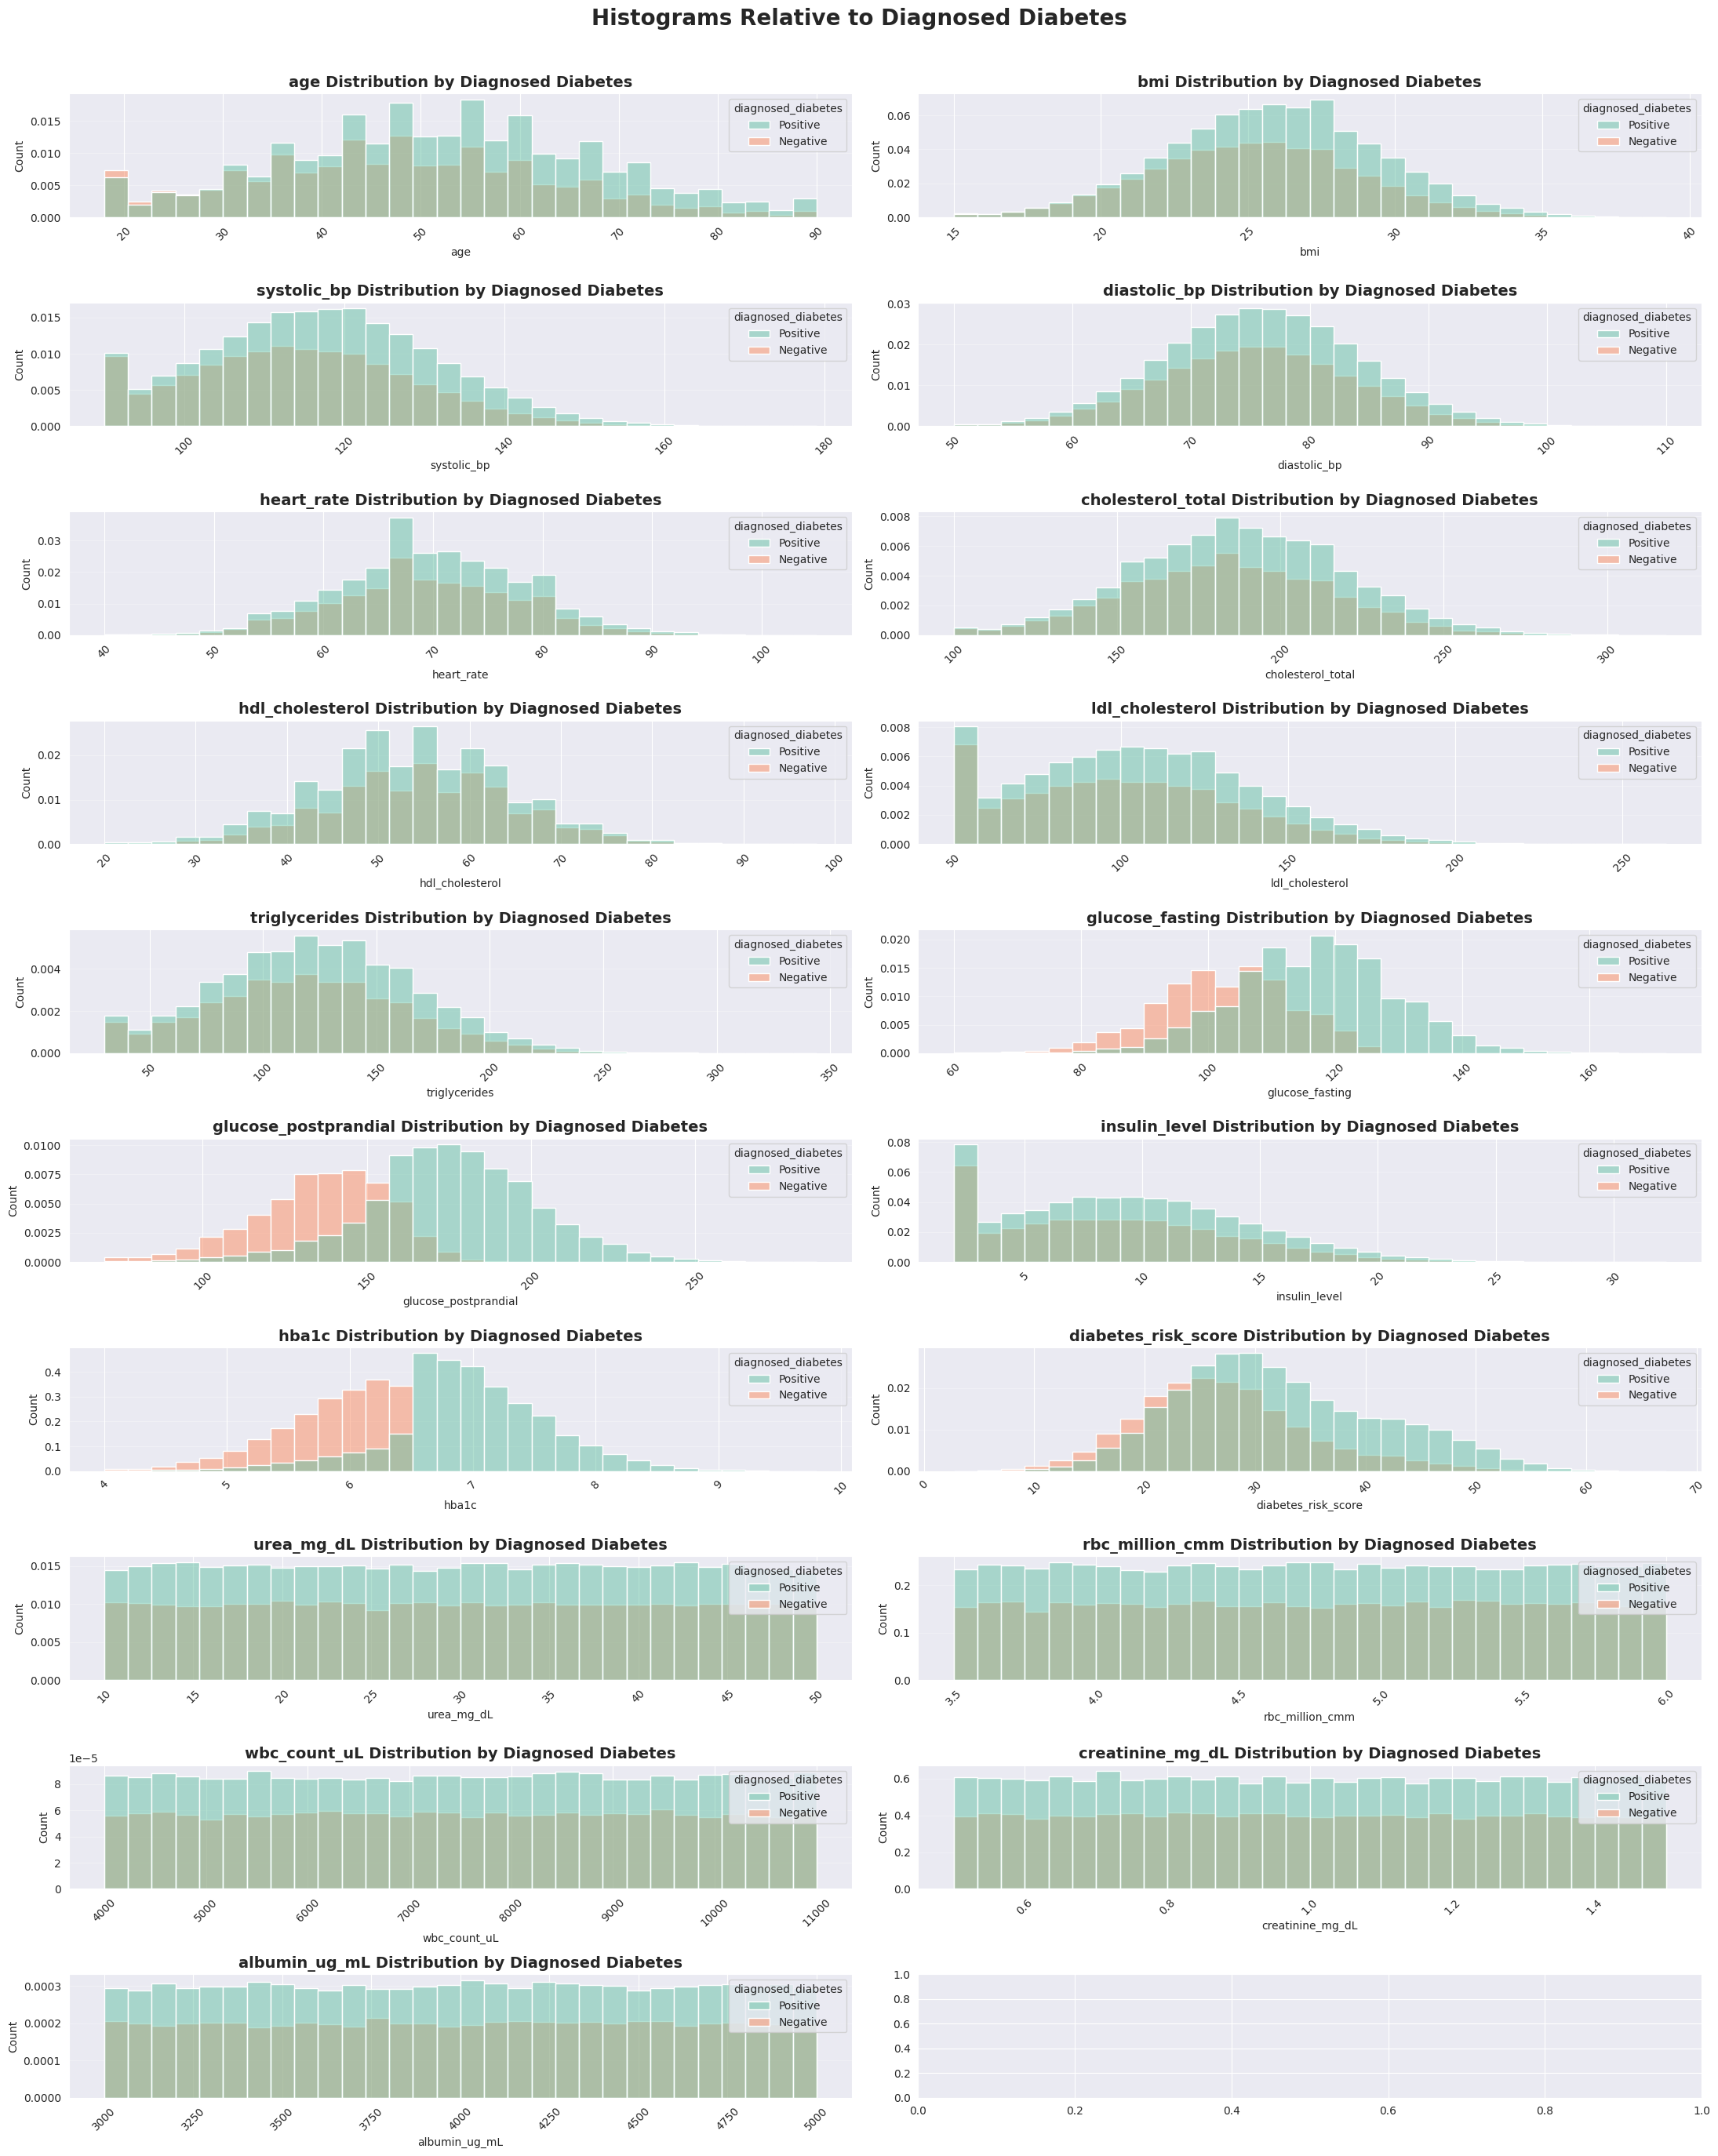

In [19]:
n_rows = math.ceil(len(numerical_features) / 2)
fig, ax = plt.subplots(figsize=(22, 28), nrows=n_rows, ncols=2)
ax = ax.flatten()

for idx, col in enumerate(numerical_features):

    sns.histplot(
        data=df,
        x=col,
        hue='diagnosed_diabetes',
        bins=30,
        stat='density',
        alpha=0.5,
        ax=ax[idx],
        palette='Set2'
    )

    ax[idx].set_title(f'{col} Distribution by Diagnosed Diabetes', fontsize=14, weight='bold')
    ax[idx].set_xlabel(col)
    ax[idx].set_ylabel("Count")
    ax[idx].tick_params(axis='x', rotation=45)
    ax[idx].grid(axis='y', alpha=0.3)

fig.suptitle("Histograms Relative to Diagnosed Diabetes",
             fontsize=20, weight='bold')


plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


# <b>3 <span style='color:#9146ff'>|</span> Data Preprocessing</b>

In [20]:
# label Encoding
le = LabelEncoder()
for i in categorical_features :
    df[i] = le.fit_transform(df[i])

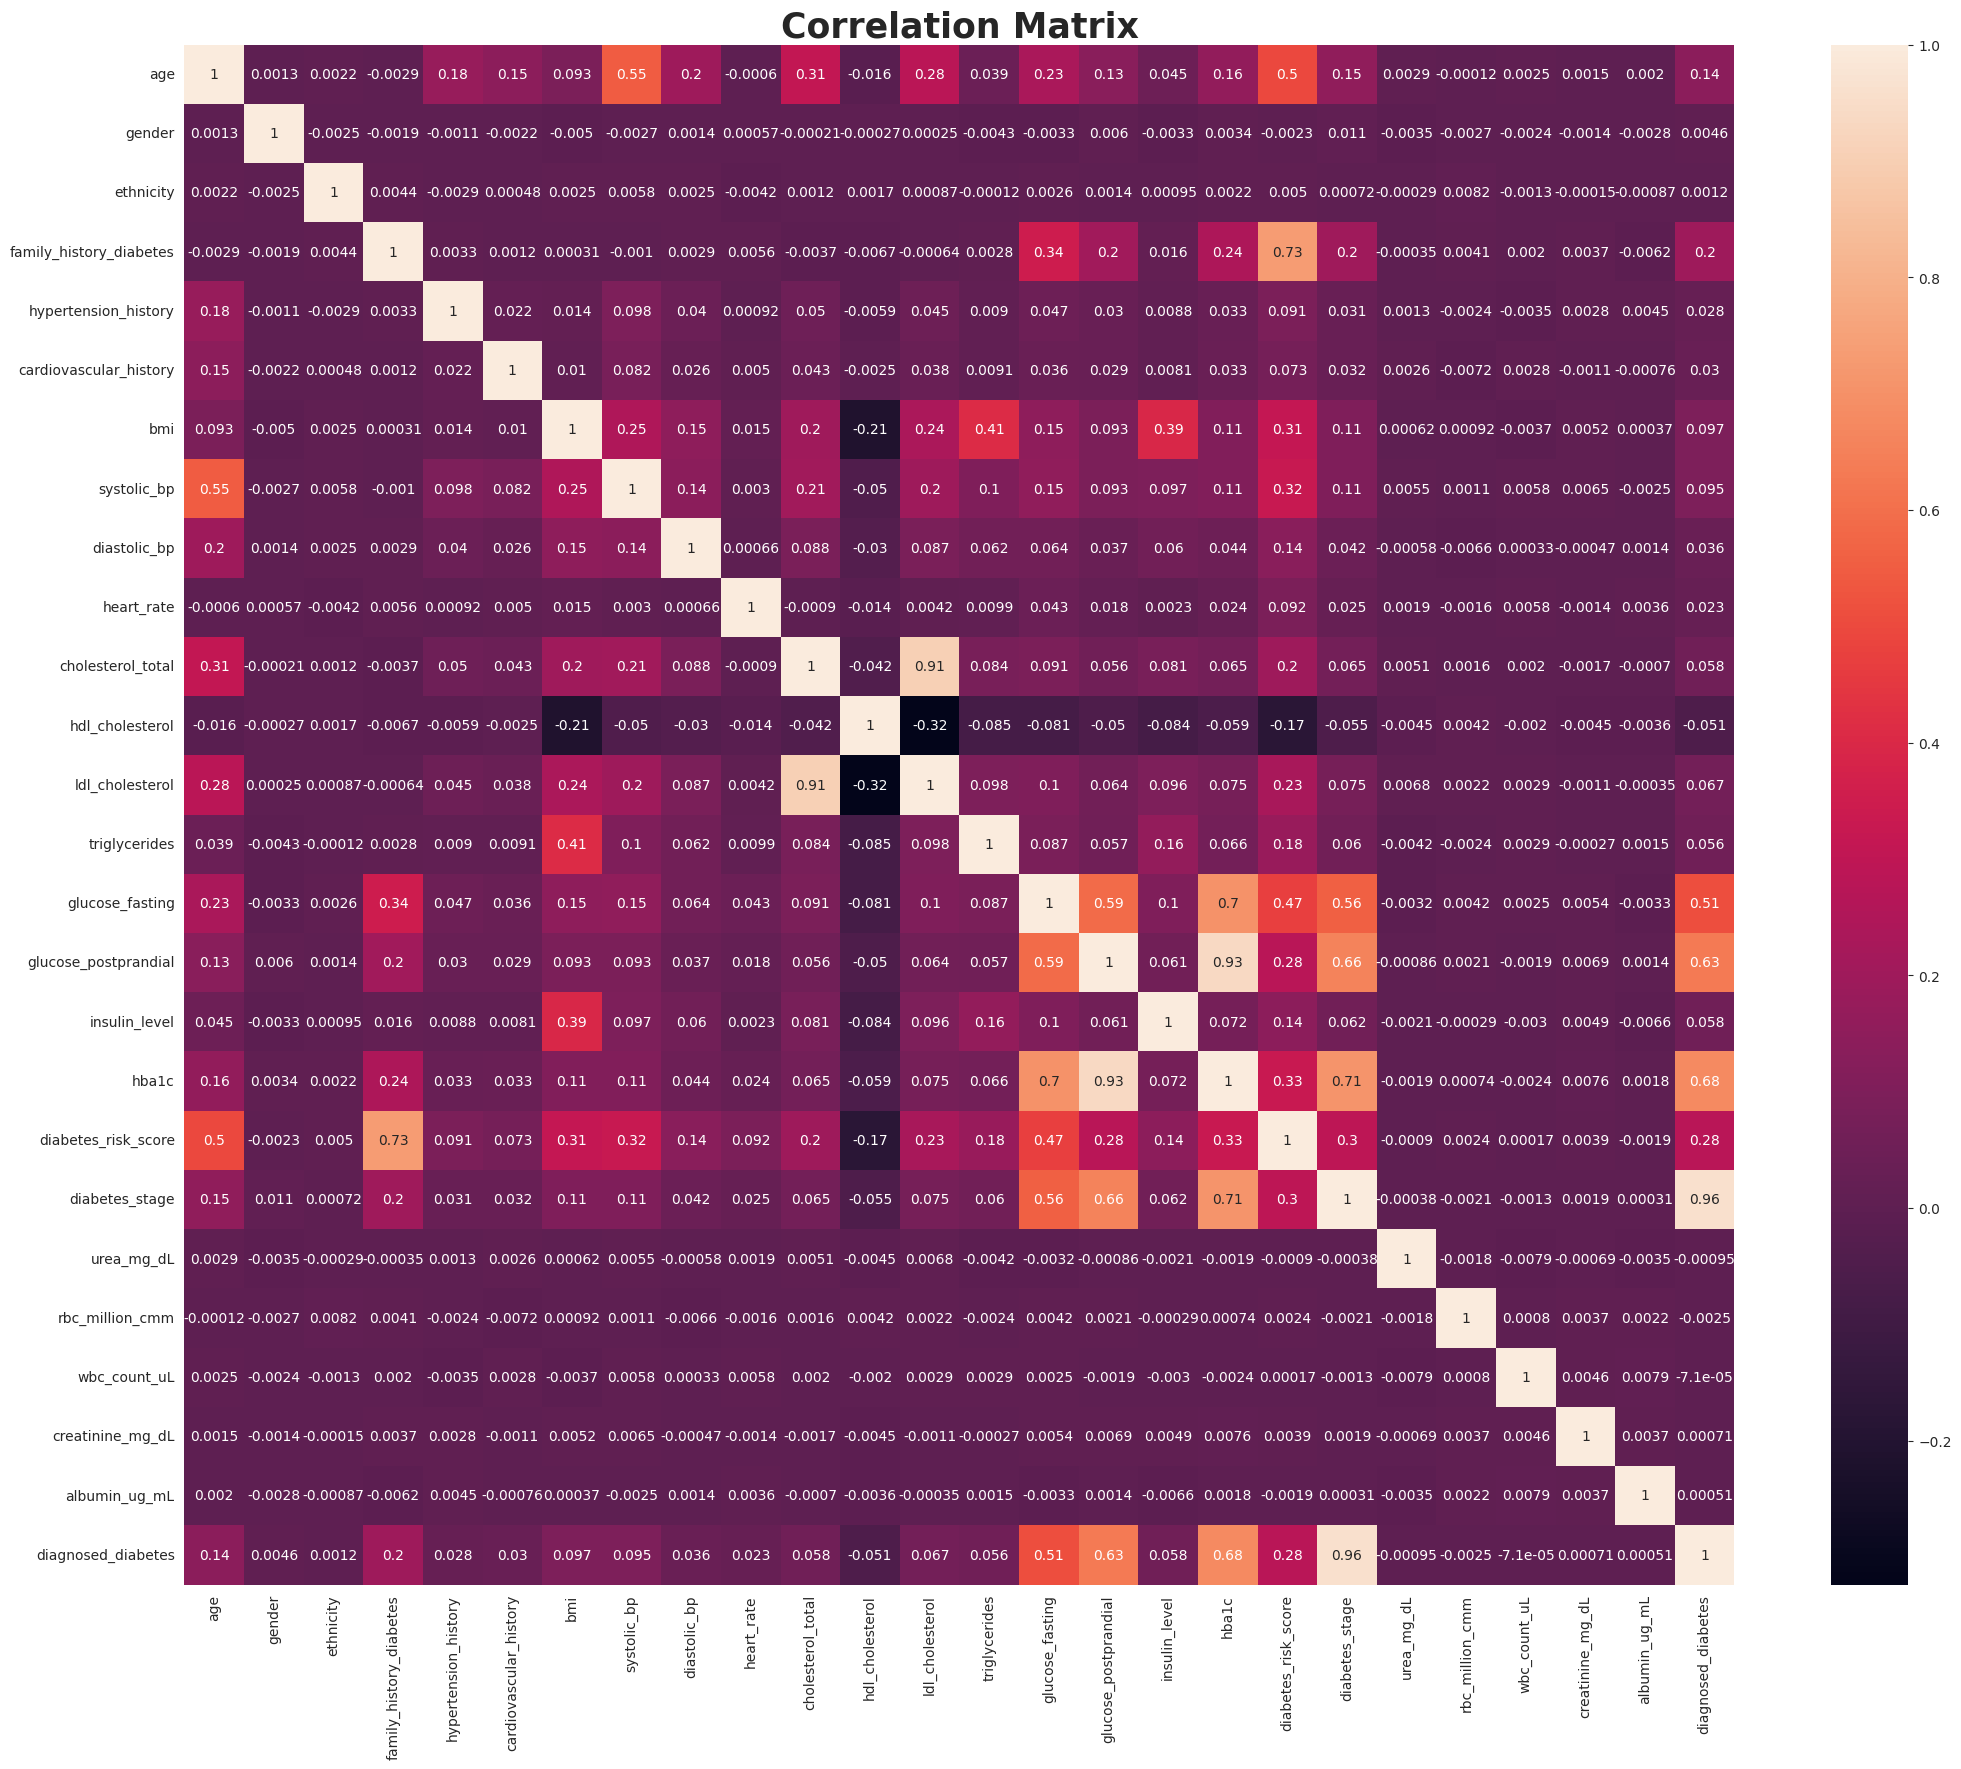

In [21]:
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix' , fontsize = 25 , weight='bold')
plt.show()

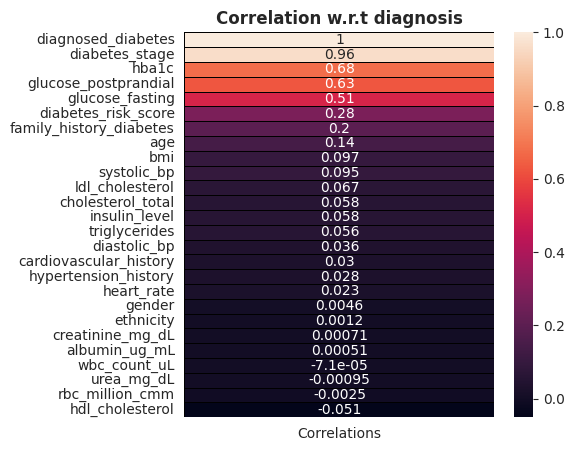

In [22]:
corr = df.corrwith(df['diagnosed_diabetes']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t diagnosis' , weight='bold');

In [23]:
X = np.array(df.drop('diagnosed_diabetes' , axis = 1))
Y = np.array(df['diagnosed_diabetes'])

In [24]:
# split the data
x_train , x_test , y_train , y_test = train_test_split(X , Y , train_size = 0.8 , random_state = 42)
x_train.shape , x_test.shape

((80000, 25), (20000, 25))

# <b>4 <span style='color:#9146ff'>|</span> Modeling</b>

In [25]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(x_train , y_train)

y_pred = lr.predict(x_test)

In [26]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)


--- Logistic Regression Performance ---

Accuracy : 0.81%

Recall : 0.86630881489558

Precision : 0.8257254776560876

F1 Score 0.8455304518664047

ROC_AUC Score : 0.80%


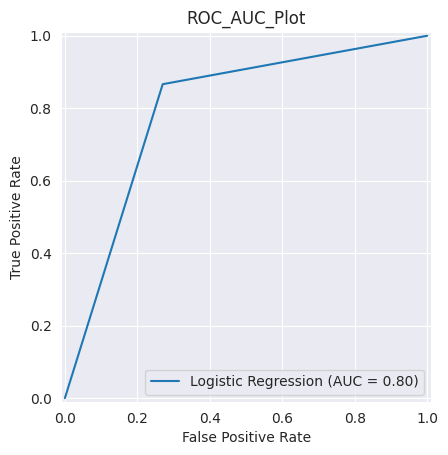

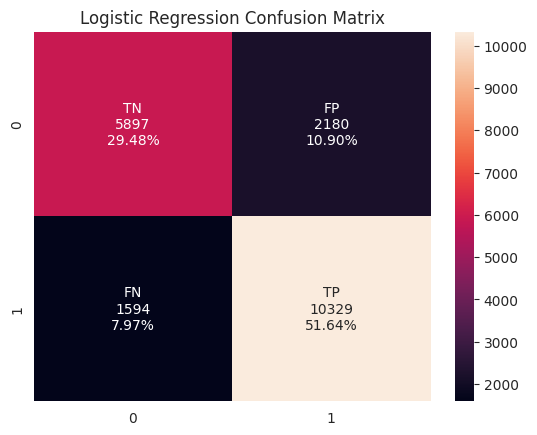

In [27]:
print("\n--- Logistic Regression Performance ---\n")
print(f"Accuracy : {accuracy_score(y_test,y_pred):0.2f}%\n")
print(f"Recall : {recall_score(y_test,y_pred)}\n")
print(f"Precision : {precision_score(y_test,y_pred)}\n")
print(f"F1 Score {f1_score(y_test,y_pred)}\n")
print(f"ROC_AUC Score : {roc_auc:0.2f}%")

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Logistic Regression")
roc_display.plot()
plt.title('ROC_AUC_Plot')
plt.show()

cm = confusion_matrix(y_test,y_pred)
names = ['TN','FP','FN','TP']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,fmt ='')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


--- Random Forest Performance ---

Accuracy : 92.02%

Recall : 0.8661

Precision : 1.0000

F1 Score : 0.9283

ROC_AUC Score : 93.89%


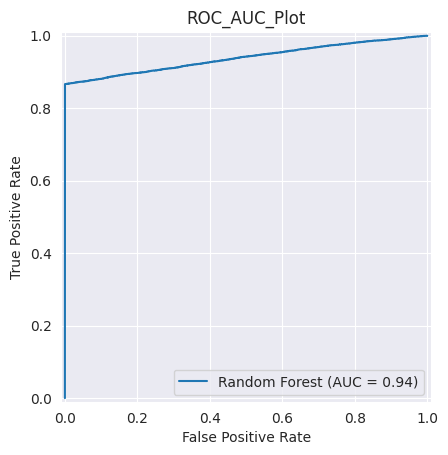

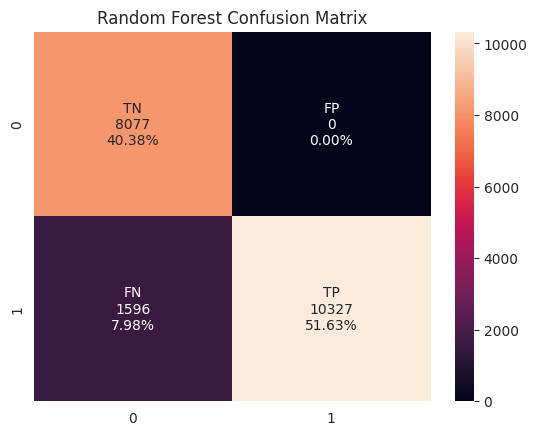

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    RocCurveDisplay
)

# 🔹 Use only a subset of important medical features for Random Forest
rf_features = [
    'age',
    'bmi',
    'systolic_bp',
    'diastolic_bp',
    'cholesterol_total',
    'hdl_cholesterol',
    'ldl_cholesterol',
    'triglycerides',
    'glucose_fasting',
    'glucose_postprandial',
    'insulin_level',
    'hba1c'
]

# df here is your already label-encoded dataframe
X_rf = df[rf_features].values
y_rf = df['diagnosed_diabetes'].values

# Fresh train–test split just for Random Forest
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf,
    y_rf,
    test_size=0.2,
    random_state=42
)

# Random Forest tuned to avoid 100% accuracy
rf_model = RandomForestClassifier(
    n_estimators=80,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=6,
    max_features="sqrt",
    bootstrap=True,
    random_state=42
)

rf_model.fit(X_train_rf, y_train_rf)

# Predictions and probabilities
y_pred = rf_model.predict(X_test_rf)
y_proba = rf_model.predict_proba(X_test_rf)[:, 1]

# ROC values + AUC
fpr, tpr, _ = roc_curve(y_test_rf, y_proba)
roc_auc = roc_auc_score(y_test_rf, y_proba)

print("\n--- Random Forest Performance ---\n")
print(f"Accuracy : {accuracy_score(y_test_rf, y_pred) * 100:0.2f}%\n")
print(f"Recall : {recall_score(y_test_rf, y_pred):0.4f}\n")
print(f"Precision : {precision_score(y_test_rf, y_pred):0.4f}\n")
print(f"F1 Score : {f1_score(y_test_rf, y_pred):0.4f}\n")
print(f"ROC_AUC Score : {roc_auc * 100:0.2f}%")

# ROC curve plot
roc_display = RocCurveDisplay(
    fpr=fpr,
    tpr=tpr,
    roc_auc=roc_auc,
    estimator_name="Random Forest"
)
roc_display.plot()
plt.title('ROC_AUC_Plot')
plt.show()

# Confusion matrix plot
cm = confusion_matrix(y_test_rf, y_pred)
names = ['TN', 'FP', 'FN', 'TP']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(cm, annot=labels, fmt='')
plt.title('Random Forest Confusion Matrix')
plt.show()


In [42]:
# FCNN
INPUT_DIM = x_train.shape[1]
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (INPUT_DIM ,)) ,
    keras.layers.Dense(64 , activation='relu') ,
    keras.layers.Dropout(0.2) ,
    keras.layers.Dense(32 , activation='relu') ,
    keras.layers.Dropout(0.2) ,
    keras.layers.Dense(1 , activation = 'sigmoid')
])

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,777 (14.75 KB)

 Trainable params: 3,777 (14.75 KB)

 Non-trainable params: 0 (0.00 B)

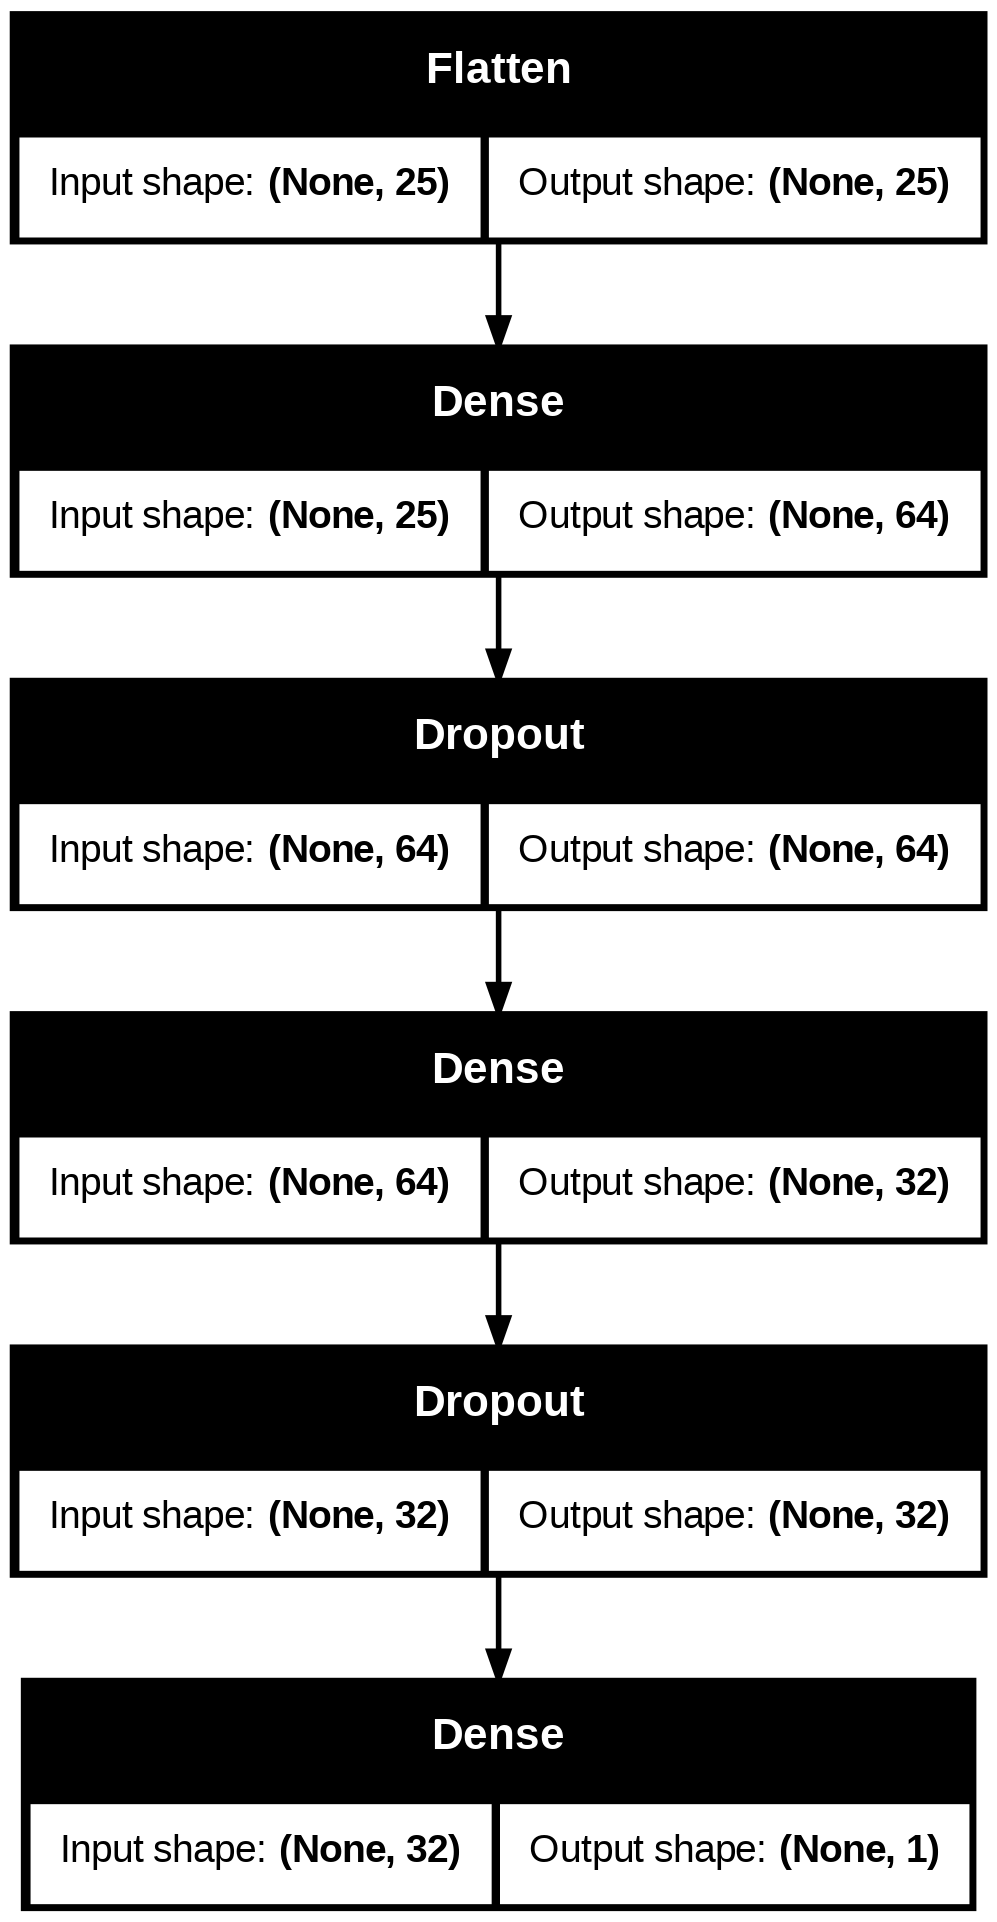

In [44]:
keras.utils.plot_model(model, show_shapes=True)

In [45]:
BATCH_SIZE = 64
EPOCHS = 5
LOSS = keras.losses.BinaryCrossentropy()
OPTIM = keras.optimizers.Adam(learning_rate = 0.001)
METRICS = ['accuracy', keras.metrics.AUC(name='AUC')]

In [46]:
model.compile(loss = LOSS , optimizer = OPTIM , metrics=METRICS)

In [47]:
history = model.fit(
    x_train , y_train ,
    validation_data=(x_test , y_test) ,
    batch_size=BATCH_SIZE ,
    epochs=EPOCHS ,
    shuffle=True ,
    verbose = 2
)

Epoch 1/5
1250/1250 - 4s - 4ms/step - AUC: 0.5006 - accuracy: 0.5732 - loss: 10.5703 - val_AUC: 0.5330 - val_accuracy: 0.5961 - val_loss: 0.6746
Epoch 2/5
1250/1250 - 3s - 2ms/step - AUC: 0.4999 - accuracy: 0.5944 - loss: 0.7150 - val_AUC: 0.5000 - val_accuracy: 0.5961 - val_loss: 0.6746
Epoch 3/5
1250/1250 - 3s - 2ms/step - AUC: 0.5018 - accuracy: 0.5991 - loss: 0.6816 - val_AUC: 0.5000 - val_accuracy: 0.5961 - val_loss: 0.6746
Epoch 4/5
1250/1250 - 3s - 3ms/step - AUC: 0.4968 - accuracy: 0.6002 - loss: 0.6829 - val_AUC: 0.5000 - val_accuracy: 0.5961 - val_loss: 0.6746
Epoch 5/5
1250/1250 - 3s - 2ms/step - AUC: 0.5016 - accuracy: 0.6004 - loss: 0.6748 - val_AUC: 0.5000 - val_accuracy: 0.5961 - val_loss: 0.6747


In [48]:
train_loss , train_acc = history.history['loss'] , history.history['accuracy']
eval_loss , eval_acc = history.history['val_loss'] , history.history['val_accuracy']
train_auc , eval_auc = history.history['AUC'] , history.history['val_AUC']

In [49]:
y_pred = tf.squeeze(model.predict(x_test).round())

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step


In [50]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)


--- FCNN Performance ---

Accuracy : 0.60%

Recall : 1.0

Precision : 0.59615

F1 Score 0.7469849324938133

ROC_AUC Score : 0.50%


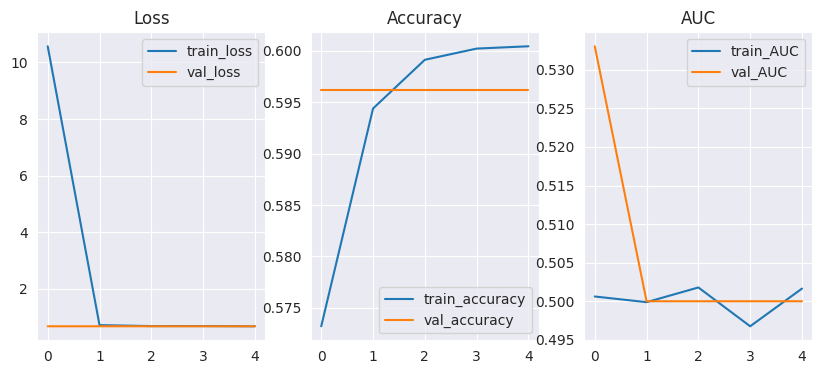

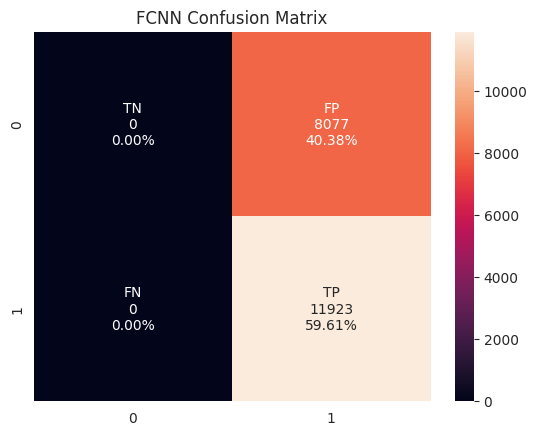

In [51]:
print("\n--- FCNN Performance ---\n")
print(f"Accuracy : {accuracy_score(y_test,y_pred):0.2f}%\n")
print(f"Recall : {recall_score(y_test,y_pred)}\n")
print(f"Precision : {precision_score(y_test,y_pred)}\n")
print(f"F1 Score {f1_score(y_test,y_pred)}\n")
print(f"ROC_AUC Score : {roc_auc:0.2f}%")


plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.plot(train_loss, label='train_loss')
plt.plot(eval_loss, label='val_loss')
plt.title('Loss')
plt.legend()

plt.subplot(1,3,2)
plt.plot(train_acc, label='train_accuracy')
plt.plot(eval_acc, label='val_accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,3,3)
plt.plot(train_auc, label='train_AUC')
plt.plot(eval_auc, label='val_AUC')
plt.title('AUC')
plt.legend()
plt.show()

cm = confusion_matrix(y_test,y_pred)
names = ['TN','FP','FN','TP']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,fmt ='')
plt.title('FCNN Confusion Matrix')
plt.show()

**SAVING THE BEST MODEL:**

In [52]:
import joblib


In [53]:
rf_model.fit(X_train_rf, y_train_rf)


RandomForestClassifier(max_depth=5, min_samples_leaf=6, min_samples_split=10,
                       n_estimators=80, random_state=42)

In [54]:
# --- SAVE MODEL + ENCODER + FEATURES ---

joblib.dump(rf_model, "random_forest_model.pkl")
joblib.dump(le, "label_encoder.pkl")        # if you use LabelEncoder
joblib.dump(rf_features, "rf_features.pkl") # save selected feature names

print("Model and preprocessing saved successfully!")


Model and preprocessing saved successfully!


**To LOAD the model**

In [55]:
import joblib
import numpy as np
import pandas as pd

# Load saved parts
rf_model = joblib.load("random_forest_model.pkl")
le = joblib.load("label_encoder.pkl")
rf_features = joblib.load("rf_features.pkl")

print("Model Loaded!")


Model Loaded!


***To make predictions on NEW data***

In [56]:
new_data = pd.DataFrame([{
    'age': 55,
    'bmi': 27.1,
    'systolic_bp': 135,
    'diastolic_bp': 85,
    'cholesterol_total': 210,
    'hdl_cholesterol': 42,
    'ldl_cholesterol': 145,
    'triglycerides': 180,
    'glucose_fasting': 115,
    'glucose_postprandial': 168,
    'insulin_level': 8.1,
    'hba1c': 7.2
}])

# Convert to numpy array
X_new = new_data[rf_features].values

# Predict
pred = rf_model.predict(X_new)[0]
proba = rf_model.predict_proba(X_new)[0][1]

print("Prediction:", pred)
print("Probability of diabetes:", proba)


Prediction: 1
Probability of diabetes: 0.9627649783590805
